In [90]:
import re
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
df = pd.read_csv('../bases_originais/dados.csv', delimiter=',')

In [92]:
# expressão regular para remover caracteres especiais
df['Título'] = df['Título'].str.replace("[\[\]+\-/º\"']", "", regex=True)
df['Título'] = df['Título'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
df['Título'] = df['Título'].str.replace('í', 'i').str.replace('ó', 'o').str.replace('ê', 'e')
df['Preço'] = df['Preço'].str.replace('[\[\]\"\']|R\$', '', regex=True)
# Remover o primeiro valor
df['Preço'] = df['Preço'].str.replace('^\d+(,\d+)?\s+', '', regex=True)
# Remover a palavra "por"
df['Preço'] = df['Preço'].str.replace('por', '', regex=True).str.strip()
df['Preço'] = df['Preço'].str.replace('R\$', '').str.replace(',', '.')


/tmp/ipykernel_45298/3109828352.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Preço'] = df['Preço'].str.replace('R\$', '').str.replace(',', '.')


In [93]:
#Vê se no aqrvivo csv existe duplicatas 
duplicates = df.duplicated().sum()
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f'{duplicates} registros duplicados foram removidos.')
else:
    print('Não há registros duplicados.')


Não há registros duplicados.


In [94]:
##Removendo valores duplicados
df = df[df['Preço'].astype(bool)]

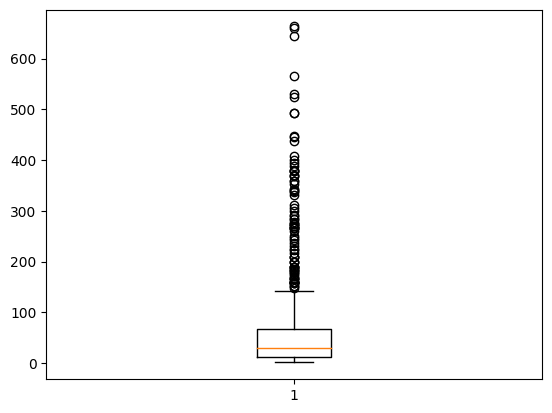

In [95]:
##Verifique a existência de outliers
df['Preço'] = df['Preço'].apply(lambda x: re.findall(r'\d+\.\d+', x)[0]).astype(float)
plt.boxplot(df['Preço'])
plt.show()

In [96]:
##Removendo os outliers
Q1 = df['Preço'].quantile(0.25)
Q3 = df['Preço'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = df[(df['Preço'] > upper) | (df['Preço'] < lower)]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)
    print(f'{outliers.shape[0]} outliers foram removidos.')
else:
    print('Não há outliers.')


88 outliers foram removidos.


In [86]:
##Crie um padrão de nomenclatura para os nomes das colunas (retirando caracteres especiais)
df.rename(columns={"Título": "titulo", "Preço": "preco"}, inplace=True)

In [87]:
##Salve a base de dados na pasta bases tratadas
df.to_csv('../bases_tratadas/dados_tratados.csv', index=False)